# Week 7 ( Aaron Kohn)
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT



## Exercise 7-1

In [1]:
#from __future__ import print_function, division

%matplotlib inline

import numpy as np
import random
# import brfss
import nsfg
import thinkstats2
import thinkplot

In [2]:
preg = nsfg.ReadFemPreg()


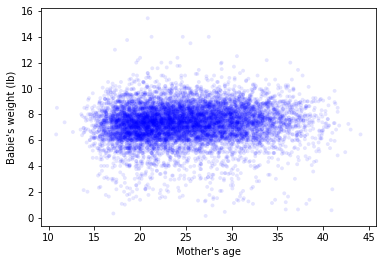

<Figure size 576x432 with 0 Axes>

In [3]:
thinkplot.Scatter(preg.agepreg, preg.totalwgt_lb, alpha = 0.1, s= 15)
thinkplot.Show(xlabel= "Mother's age", ylabel= "Babie's weight (lb)")

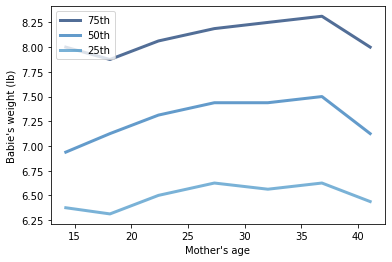

<Figure size 576x432 with 0 Axes>

In [4]:
df = preg.dropna(subset= ['agepreg', 'totalwgt_lb'])
bins = np.arange(10, 70, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)
#for i, group in groups:
age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50 , 25]:
    weight = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age, weight, label= label)
thinkplot.Show(xlabel= "Mother's age", ylabel= "Babie's weight (lb)")

In [5]:
print("Pearson's correlation = ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb))
print("Spearman's correlation = ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb) )

Pearson's correlation =  0.0688339703541091
Spearman's correlation =  0.09461004109658226


## Exercise 8-1

In [6]:
# Functions copied from provided code
def MeanError(estimates, actual): 
    """Computes the mean error of a sequence of estimates.
    estimate: sequence of numbers
    actual: actual value
    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.
    estimate: sequence of numbers
    actual: actual value
    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [7]:
def Estimate1(n=7, iters=1000):
    """Evaluates Mean Error of sample mean and median as estimators.
    n: sample size
    iters: number of iterations
    """
    random.seed(333) # Set seed for reproductivity
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('MBE of mean', MeanError(means, mu))
    print('MBE of median', MeanError(medians, mu))
    
Estimate1()

Experiment 1
MBE of mean 0.004921971737098601
MBE of median 0.0034465713617341438


The above numbers indicate that both mean and median can be said to be unbiased estimators.

In [8]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1
    random.seed(333)
    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Biased', RMSE(estimates1, sigma**2))
    print('Unbiased', RMSE(estimates2, sigma**2))
print('RMSE')    
Estimate2()

RMSE
Biased 0.5182714478127696
Unbiased 0.5804949162283392


As indicated above the the $S^{2}$ has a lower root mean square error (RMSE) than $S^{2}_{n-1}$.

## Exercise 8-2

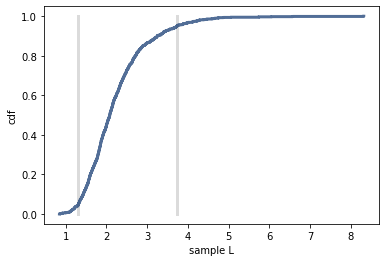

confidence interval 90% [1.3136956119019183, 3.7284861171782233]
Standard error  0.8154668766898411


<Figure size 576x432 with 0 Axes>

In [9]:
def ExponentialSample(n=10, iters=1000):
    lam = 2

    means = []
    
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)

    return means
  
means = ExponentialSample()
cdf = thinkstats2.Cdf(means)
inter5, inter95 = cdf.Percentile(5), cdf.Percentile(95)
thinkplot.Plot([inter5, inter5],[0,1], color='0.8', linewidth=3)
thinkplot.Plot([inter95, inter95],[0,1], color='0.8', linewidth=3)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel= 'sample L', ylabel= 'cdf')

print('confidence interval 90%',[cdf.Percentile(5), cdf.Percentile(95)])
standard_error = RMSE(means, 2)
print('Standard error ', standard_error)

10 0.8035623697376968 [1.2793929344200776, 3.6756425312240495]
20 0.5153031291732016 [1.407934042632114, 2.9813304448530467]
35 0.35285406153663185 [1.562074936306276, 2.66237849805814]
50 0.2900176399859945 [1.6208747814775943, 2.5770684487962816]
100 0.2091148121554023 [1.6952218489675193, 2.3933801252882234]


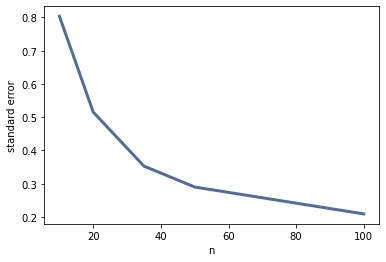

<Figure size 576x432 with 0 Axes>

In [10]:
ns = [10,20,35,50,100]
ses = []
for n in ns:
    means = ExponentialSample(n=n)
    se = RMSE(means, 2)
    ses.append(se)
    cdf = thinkstats2.Cdf(means)
    inter5, inter95 = cdf.Percentile(5), cdf.Percentile(95)
    print(n, se, [inter5, inter95])
thinkplot.plot(ns,ses)
thinkplot.show(xlabel= 'n', ylabel= 'standard error')
